In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

### Why Q-Q plot?

Since normal distribution is of so much importance, we need to check if the collected data is normal or not. 

Here, we will demonstrate the Q-Q plot to check the normality of skewness of data. 

Q stands for quantile and therefore, Q-Q plot represents quantile-quantile plot.

We now know Q-Q plot is quantile-quantile plot but what is quantile at the first place? 
When the whole data is sorted, 50th quantile means 50% of the data falls below that point 
and 50% of the data falls above that point. That is the median point. 
When we say 1st quantile, only 1% of the data falls below that point 
and 99% is above that. 25th and 75th quantile points are also known as quartiles. 

There are three quartiles is the dataset.

Q1 = first quartile = 25th quantile

Q2 = second quartile = 50th quantile = median

Q3 = third quartile = 75th quantile

Quantile are sometimes called percentile. 

### Now let’s use a Q-Q plot to analyze various sample distribution types

### Normal Distribution

In [ ]:
# We can use the np.random.normal for this. 
# In the below example, data is normally distributed data with a mean 0 and a Standard deviation of 1.

In [2]:
np_normal = pd.Series(np.random.normal(0, 1, 200))
np_normal

0      1.507844
1     -0.479287
2      0.253382
3     -0.461541
4      0.982850
         ...   
195    1.547476
196    0.957750
197    0.069523
198   -0.293344
199    0.297659
Length: 200, dtype: float64

<AxesSubplot:ylabel='Count'>

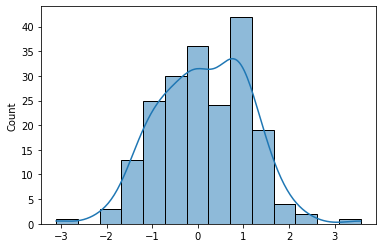

In [6]:
# Let’s plot this using hist plot to see if it’s normally distributed.
sns.histplot(np_normal,kde=True)

In [ ]:
# np.random.normal()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


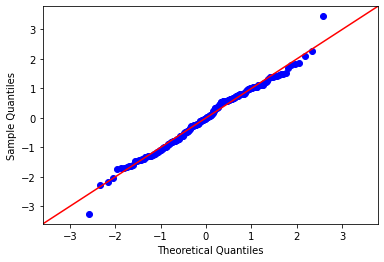

In [19]:
sm.qqplot(np_normal,line='45',fit=True,dist=stats.norm)
plt.show()

#### Conclusion: We can see that since we are plotting the data with the theoretical quantiles of a normal distribution, we are getting almost a straight line

### Uniform Distribution

In [ ]:
# Now let’s try to plot uniformly distributed data and compare it with normal distribution.

In [10]:
np_uniform = pd.Series(np.random.uniform(-5, 5, 200))

<AxesSubplot:ylabel='Count'>

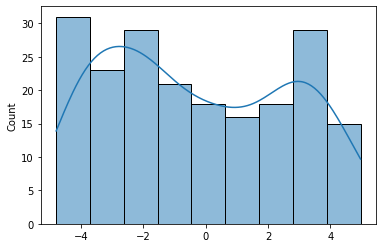

In [13]:
sns.histplot(np_uniform,kde=True)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


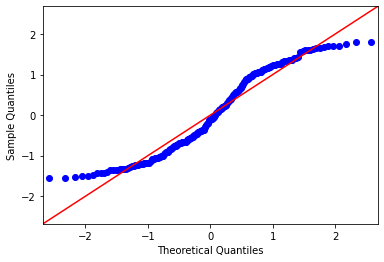

In [11]:
sm.qqplot(np_uniform,line='45',fit=True,dist=stats.norm)
plt.show()

#### Conclusion: As you can see in the above Q-Q plot since our dataset has a uniform distribution, both the right and left tails are small and the extreme values in the above plot are falling close to the center. In a normal distribution, these theoretical extreme values will fall beyond 2 & -2 sigmas and hence the S shape of the Q-Q plot of a uniform distribution.

### Exponential Distribution

In [ ]:
# If we plot a variable with exponential distribution with theoretical normal distribution, the graph would look like below.

In [15]:
np_exp = pd.Series(np.random.exponential(scale=1.0, size=200))

<AxesSubplot:ylabel='Count'>

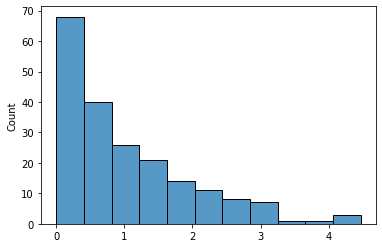

In [17]:
sns.histplot(np_exp)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


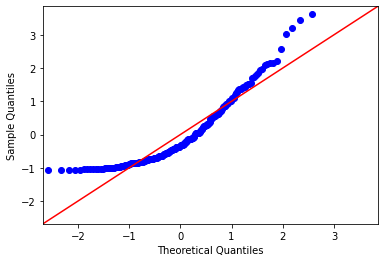

In [18]:
sm.qqplot(np_exp,fit=True,line='45',dist=stats.norm)
plt.show()

## Q-Q plots and skewness of data

Now let’s see how we can determine skewness using a Q-Q plot

Q-Q plots can be used to determine skewness as well. If the see the left side of the plot deviating from the line, it is left-skewed. When the right side of the plot deviates, it’s right-skewed.

Let’s create a left-skewed distribution using skewnorm from the script library.

In [2]:
import pandas as pd
from scipy.stats import skewnorm
import matplotlib.pyplot as plt

skewness = -5 #Negative values are left skewed, positive values are right skewed.

random = skewnorm.rvs(a = skewness,loc=1000, size=50000)  #Skewnorm function

random = random - min(random)      #Shift the set so the minimum value is equal to zero.
random = random / max(random)      #Standadize all the vlues between 0 and 1. 
random = random * 50000  
random = pd.Series(random)

The distribution would look like below:

When we plot Q-Q plot, we should observe deviation on the left side

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


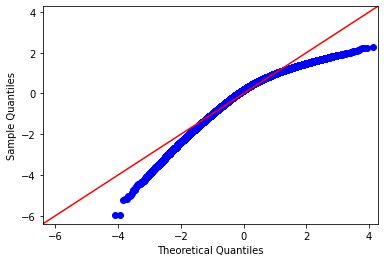

In [5]:
sm.qqplot(random,fit=True,line='45') 
plt.show()

Similarly, a right-skewed distribution would look like below. We can observe deviation on the right side

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


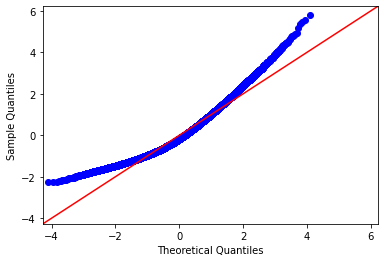

In [8]:
skewness = 5 #Negative values are left skewed, positive values are right skewed.

random = skewnorm.rvs(a = skewness,loc=1000, size=50000)  #Skewnorm function

random = random - min(random)      #Shift the set so the minimum value is equal to zero.
random = random / max(random)      #Standadize all the vlues between 0 and 1. 
random = random * 50000  
random = pd.Series(random)
sm.qqplot(random,fit=True,line='45') 
plt.show()

#### Conclusion

As you build your machine learning model, ensure you check the distribution of the error terms or prediction error 
using a Q-Q plot. 
If there is a significant deviation from the mean, you might want to check the distribution of your feature variable 
and consider transforming them into a normal shape.

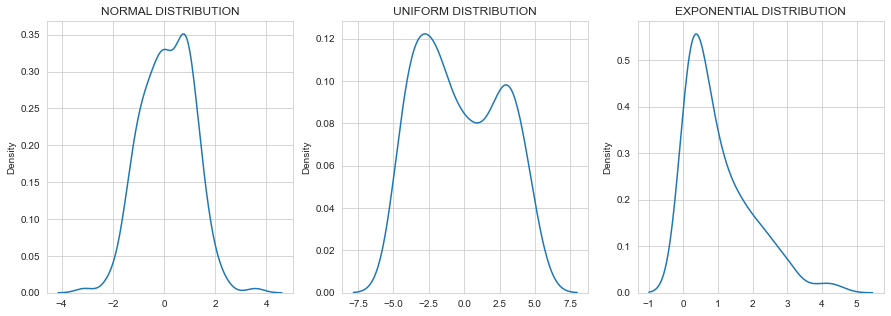

In [21]:
sns.set_style("whitegrid") 
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.kdeplot(np_normal)
plt.title("NORMAL DISTRIBUTION")
plt.subplot(1,3,2)
sns.kdeplot(np_uniform)
plt.title("UNIFORM DISTRIBUTION")
plt.subplot(1,3,3)
sns.kdeplot(np_exp)
plt.title("EXPONENTIAL DISTRIBUTION")
plt.show()